<a href="https://colab.research.google.com/github/nabeelalikhan1/CNN-based-TF-image-enhancement/blob/main/wvd_TF_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

#!pip install tensorflow
import tensorflow as tf
#!pip install segmentation-models
#!pip install keras 
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
import glob
import random
import cv2
from random import shuffle
import scipy.io as spio
import h5py
BACKBONE = 'resnet34'


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
mat = spio.loadmat('gdrive/My Drive/wvd.mat', squeeze_me=True)
df=mat['Input_wvd']
y=mat['Output']
mat1 = spio.loadmat('gdrive/My Drive/Set_128.mat', squeeze_me=True)
df_l=mat1['Input']
y_l=mat1['Output']
df_l=df_l[:,:,:,2:3]

print(df.shape)
print(df_l.shape)
df=np.reshape(df,(5000,128,128,1))

df=np.concatenate((df, df_l), axis=0)
y=np.concatenate((y, y_l), axis=0)

mat1 = spio.loadmat('gdrive/My Drive/wvd_spike.mat', squeeze_me=True)
df_1=mat1['Input_wvd']
y_1=mat1['Output']
df_1=np.reshape(df_1,(50,128,128,1))

df=np.concatenate((df, df_1), axis=0)
y=np.concatenate((y, y_1), axis=0)

mat1 = spio.loadmat('gdrive/My Drive/wvd_spike_tone.mat', squeeze_me=True)
df_1=mat1['Input_wvd']
y_1=mat1['Output']
df_1=np.reshape(df_1,(50,128,128,1))

df=np.concatenate((df, df_1), axis=0)
y=np.concatenate((y, y_1), axis=0)

mat1 = spio.loadmat('gdrive/My Drive/wvd_spike_tone_var_amplitude.mat', squeeze_me=True)
df_1=mat1['Input_wvd']
y_1=mat1['Output']
print(df_1.shape)
df_1=np.reshape(df_1,(200,128,128,1))

#df=np.concatenate((df, df_1), axis=0)
#y=np.concatenate((y, y_1), axis=0)




(5000, 128, 128)
(186, 128, 128, 1)
(200, 128, 128)


(5286, 128, 128, 1)


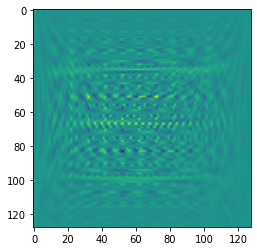

In [ ]:
print(df.shape)
plt.imshow(df[-1,:,:,0])

In [ ]:
#model = tf.keras.models.Sequential([
#tf.keras.layers.Conv2D(16, (3,3),padding='same', activation='relu', input_shape=(128, 128, 2)),
#tf.keras.layers.MaxPooling2D(2,2),
#tf.keras.layers.Conv2DTranspose(16, (3,3),padding='same', strides=2),
#
#tf.keras.layers.Conv2D(1, (3,3),padding='same',activation='relu')
#])

model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (16,16),padding='same', input_shape=(128, 128,1)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Activation('relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Conv2D(32, (8,8), padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Activation('relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Conv2D(64, (4,4), padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Activation('relu'),

tf.keras.layers.MaxPooling2D(2,2),


tf.keras.layers.Conv2DTranspose(64, (4,4),padding='same', strides=2),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Activation('relu'),
tf.keras.layers.Dropout(0.25),

tf.keras.layers.Conv2DTranspose(32, (8,8),padding='same', strides=2),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Activation('relu'),
tf.keras.layers.Dropout(0.25),

tf.keras.layers.Conv2DTranspose(1, (16,16),padding='same', strides=2)
#tf.keras.layers.Conv2DTranspose(1, (4,4),padding='same', strides=2)
])


print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 16)      4112      
_________________________________________________________________
batch_normalization_20 (Batc (None, 128, 128, 16)      64        
_________________________________________________________________
activation_20 (Activation)   (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 32)        32800     
_________________________________________________________________
batch_normalization_21 (Batc (None, 64, 64, 32)       

In [ ]:
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
#df=np.reshape(df,(10000,128,128,1))
#print(df.shape)
#print(y.shape)
model.fit(df, y, epochs=500)
model.save('gdrive/My Drive/wvd_model.h7')


Epoch 1/500
166/166 [==============================] - 6s 38ms/step - loss: 0.0329 - accuracy: 0.9042
Epoch 2/500
166/166 [==============================] - 6s 38ms/step - loss: 0.0154 - accuracy: 0.9100
Epoch 3/500
166/166 [==============================] - 6s 39ms/step - loss: 0.0135 - accuracy: 0.9100
Epoch 4/500
166/166 [==============================] - 6s 39ms/step - loss: 0.0123 - accuracy: 0.9100
Epoch 5/500
166/166 [==============================] - 6s 39ms/step - loss: 0.0117 - accuracy: 0.9100
Epoch 6/500
166/166 [==============================] - 6s 39ms/step - loss: 0.0110 - accuracy: 0.9100
Epoch 7/500
166/166 [==============================] - 6s 39ms/step - loss: 0.0105 - accuracy: 0.9101
Epoch 8/500
166/166 [==============================] - 6s 38ms/step - loss: 0.0100 - accuracy: 0.9103
Epoch 9/500
166/166 [==============================] - 6s 38ms/step - loss: 0.0096 - accuracy: 0.9106
Epoch 10/500
166/166 [==============================] - 6s 38ms/step - loss: 0.009

(1, 128, 128, 1)
(1, 128, 128, 1)
508.1785
[[0.0035475  0.00359612 0.00265316 0.00139624]
 [0.00176716 0.00304118 0.00115368 0.00081516]
 [0.00137    0.00259698 0.00091488 0.0005041 ]
 [0.00105665 0.00255911 0.00166337 0.00030166]]


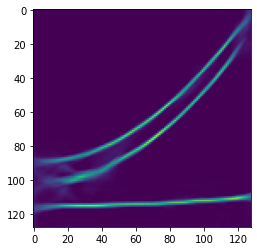

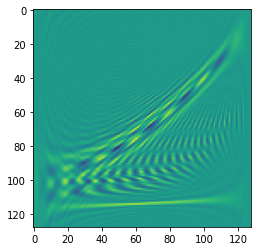

In [ ]:
from keras.models import load_model

#model=load_model('gdrive/My Drive/wvd_model.h5')

mat = spio.loadmat('gdrive/My Drive/adtfd_test_128.mat', squeeze_me=True)
#mat = spio.loadmat('gdrive/My Drive/adtfd_test_128_noisy.mat', squeeze_me=True)
#
df_test=mat['yy']

df2=df_test[1:2,:,:,2:3]
#df2=df[2000:2001,:,:,:]

#df2=np.expand_dims(df2,axis=4)
yy=model.predict(df2)
print(yy.shape)
print(df2.shape)
yyy=np.reshape(yy,(128,128))
#yyy=np.reshape(y[1,:,:],(128,128))

print(np.sum(yyy))
print(yyy[1:5,1:5])
yyy[yyy<0]=0
plt. figure(1)

plt.imshow(yyy)
yyy=np.reshape(df2[:,:,:,0:1],(128,128))
plt. figure(2)

plt.imshow(yyy)

(2, 128, 128)
(128, 128)
(1, 128, 128, 1)
(1, 128, 128, 1)


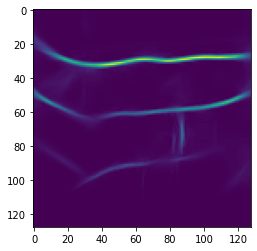

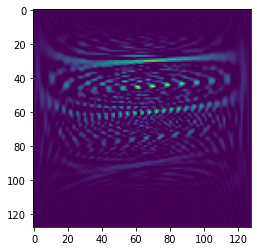

In [ ]:
mat = spio.loadmat('gdrive/My Drive/EEG_WVD.mat', squeeze_me=True)

df_test=mat['EEG_WVD']
print(df_test.shape)
df_test=df_test[0,:,:]
print(df_test.shape)
df_test=np.reshape(df_test,(1,128,128,1))
#df_test[df_test<0]=0
print(yy.shape)
print(df_test.shape)
#df_test=np.swapaxes(df_test,0,3)
yy=model.predict(df_test)
yy[yy<0]=0
df_test[df_test<0]=0
#print((yy[0,50:60,50:60,0]))
plt. figure(1)
plt.imshow((np.squeeze(yy)))
plt. figure(2)
plt.imshow(np.squeeze(df_test))


In [ ]:

from mpl_toolkits.axes_grid1 import make_axes_locatable
#yy=yy.clip([0, abs(yy.max())])
#plt.imshow(df[33,:,:,0])
fig2=plt.figure()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.title("(a)",fontsize=24)
plt.xlabel('Samples',fontsize=20)
plt.ylabel('Frequency / Hz',fontsize=20)
ax=plt.gca()
im=ax.imshow((yy[1,:,:,0]),origin='lower', extent=[0, 128, 0, 64])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.savefig('gdrive/My Drive/DeepBased2.png',dpi=800,bbox_inches='tight')

In [ ]:
#ax = plt.subplot(3, 1, 1)
#plt.imshow((df_test[1,:,:,0]),cmap='gray_r',origin='lower', extent=[0, 128, 0, 64])

plt.imshow((yy[0,:,:,0]),cmap='gray_r',origin='lower', extent=[0, 128, 0, 64])

# plt.imshow(x_test[4,:,:,2],origin='lower', extent=[0, 128, 0, 64])
#ax = plt.subplot(3, 1, 2)
plt.show
plt.savefig('gdrive/My Drive/ADTFDBased2.png',dpi=600,bbox_inches='tight')

      



In [ ]:
spio.savemat('gdrive/My Drive/result.mat',{'yy':yy})

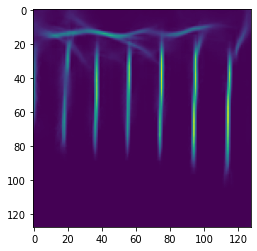

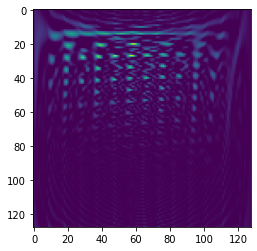

In [ ]:
from keras.models import load_model

#model=load_model('gdrive/My Drive/wvd_model.h6')


#mat = spio.loadmat('gdrive/My Drive/Input_wvd_eeg_67.mat', squeeze_me=True)
#mat = spio.loadmat('gdrive/My Drive/Input_wvd_eeg_63.mat', squeeze_me=True)
#mat = spio.loadmat('gdrive/My Drive/Input_wvd_eeg_175.mat', squeeze_me=True)
#mat = spio.loadmat('gdrive/My Drive/Input_wvd_eeg_33.mat', squeeze_me=True)
#mat = spio.loadmat('gdrive/My Drive/Input_wvd_eeg_15.mat', squeeze_me=True)
mat = spio.loadmat('gdrive/My Drive/Input_wvd_eeg_11.mat', squeeze_me=True)

df_test=mat['Input_wvd_eeg_11']

df_test=np.reshape(df_test,(1,128,128,1))
#df_test[df_test<0]=0

#df_test=np.swapaxes(df_test,0,3)
yy=model.predict(df_test)
yy[yy<0]=0
df_test[df_test<0]=0
#print((yy[0,50:60,50:60,0]))
plt. figure(1)
plt.imshow((np.squeeze(yy)))
plt. figure(2)
plt.imshow(np.squeeze(df_test))
out_mat={}
out_mat['yy']=yy
spio.savemat('CNNtone',out_mat)

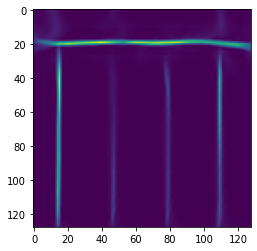

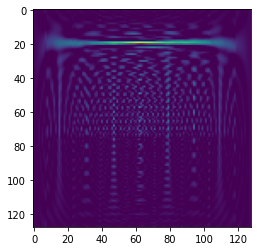

In [ ]:
from keras.models import load_model

#model=load_model('gdrive/My Drive/wvd_model.h6')


#mat = spio.loadmat('gdrive/My Drive/Input_wvd_eeg_67.mat', squeeze_me=True)
#mat = spio.loadmat('gdrive/My Drive/Input_wvd_eeg_63.mat', squeeze_me=True)
#mat = spio.loadmat('gdrive/My Drive/Input_wvd_eeg_174.mat', squeeze_me=True)
#mat = spio.loadmat('gdrive/My Drive/Input_wvd_eeg_175.mat', squeeze_me=True)
#mat = spio.loadmat('gdrive/My Drive/Input_wvd_eeg_33.mat', squeeze_me=True)
#mat = spio.loadmat('gdrive/My Drive/Input_wvd_eeg_15.mat', squeeze_me=True)
mat = spio.loadmat('gdrive/My Drive/spike_tone.mat', squeeze_me=True)

df_test=mat['Wv']

df_test=np.reshape(df_test,(1,128,128,1))
#df_test[df_test<0]=0

#df_test=np.swapaxes(df_test,0,3)
yy=model.predict(df_test)
yy[yy<0]=0
df_test[df_test<0]=0
#print((yy[0,50:60,50:60,0]))
plt. figure(1)
plt.imshow((np.squeeze(yy)))
plt. figure(2)
plt.imshow(np.squeeze(df_test))

In [ ]:
from keras.models import load_model

mat = spio.loadmat('gdrive/My Drive/spike_tone.mat', squeeze_me=True)
model=load_model('gdrive/My Drive/wvd_model.h7')
df_test=mat['Wv']

df_test=np.reshape(df_test,(1,128,128,1))
#df_test[df_test<0]=0
yy=np.zeros([128,128,7])
#df_test=np.swapaxes(df_test,0,3)
yy[:,:,0]=np.squeeze(model.predict(df_test))

out_mat={}
#out_mat['synthetic_spike_tone']=yy

mat = spio.loadmat('gdrive/My Drive/Input_wvd_eeg_11.mat', squeeze_me=True)

df_test=mat['Input_wvd_eeg_11']

df_test=np.reshape(df_test,(1,128,128,1))

yy[:,:,1]=np.squeeze(model.predict(df_test))
#out_mat['eeg_spike_tone']=yy



mat = spio.loadmat('gdrive/My Drive/adtfd_test_128.mat', squeeze_me=True)

df_test=mat['yy']

df_test1=df_test[1:2,:,:,2:3]
yy[:,:,2]=np.squeeze(model.predict(df_test1))
#out_mat['synthetic_close_FM']=yy

df_test1=df_test[3:4,:,:,2:3]
yy[:,:,3]=np.squeeze(model.predict(df_test1))

#out_mat['crossing_FM']=yy

mat = spio.loadmat('gdrive/My Drive/adtfd_test_128_noisy.mat', squeeze_me=True)

df_test=mat['yy']

df_test=df_test[3:4,:,:,2:3]
yy[:,:,4]=np.squeeze(model.predict(df_test))


mat = spio.loadmat('gdrive/My Drive/Input_wvd_eeg_175.mat', squeeze_me=True)

df_test=mat['Input_wvd_eeg_175']

df_test=np.reshape(df_test,(1,128,128,1))

yy[:,:,5]=np.squeeze(model.predict(df_test))



spio.savemat('gdrive/My Drive/CNNTFDs.mat',out_mat)



mat = spio.loadmat('gdrive/My Drive/EEG_WVD.mat', squeeze_me=True)

df_test=mat['EEG_WVD']
df_test=df_test[0,:,:]
df_test=np.reshape(df_test,(1,128,128,1))

yy[:,:,6]=np.squeeze(model.predict(df_test))
out_mat['noisy_crossing_FM']=yy


spio.savemat('gdrive/My Drive/CNNTFDs.mat',out_mat)
